In [130]:
x = ['202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212', '202301', '202302', '202303', '202304', '202305']

In [131]:
import datetime as dt


tt = []
for i in x:
    a = dt.datetime.strptime(i,'%Y%m')
    b = dt.datetime.strftime(a,'%Y-%m-01')
    tt.append(b)
x = tt

In [132]:
y = [102.69585411, 102.37561276, 101.71747588, 100.5, 99.5, 100.2, 99.7, 99.8, 100.4, 100.9, 101.3, 101.1, 101.0, 100.8, 100.7, 101.5, 102.3, 101.5, 100.9, 100.9, 101.5, 102.1, 102.1, 102.5, 102.7, 102.5, 102.8, 102.1, 101.6, 101.8, 102.1, 101.0, 100.7, 100.1, 100.2]

In [133]:
data = []
for i in range(len(x)):
    xixi = []
    xixi.append(x[i])
    xixi.append(y[i])
    data.append(list(xixi))
data

[['2020-07-01', 102.69585411],
 ['2020-08-01', 102.37561276],
 ['2020-09-01', 101.71747588],
 ['2020-10-01', 100.5],
 ['2020-11-01', 99.5],
 ['2020-12-01', 100.2],
 ['2021-01-01', 99.7],
 ['2021-02-01', 99.8],
 ['2021-03-01', 100.4],
 ['2021-04-01', 100.9],
 ['2021-05-01', 101.3],
 ['2021-06-01', 101.1],
 ['2021-07-01', 101.0],
 ['2021-08-01', 100.8],
 ['2021-09-01', 100.7],
 ['2021-10-01', 101.5],
 ['2021-11-01', 102.3],
 ['2021-12-01', 101.5],
 ['2022-01-01', 100.9],
 ['2022-02-01', 100.9],
 ['2022-03-01', 101.5],
 ['2022-04-01', 102.1],
 ['2022-05-01', 102.1],
 ['2022-06-01', 102.5],
 ['2022-07-01', 102.7],
 ['2022-08-01', 102.5],
 ['2022-09-01', 102.8],
 ['2022-10-01', 102.1],
 ['2022-11-01', 101.6],
 ['2022-12-01', 101.8],
 ['2023-01-01', 102.1],
 ['2023-02-01', 101.0],
 ['2023-03-01', 100.7],
 ['2023-04-01', 100.1],
 ['2023-05-01', 100.2]]

In [127]:
#简单移动平均法
kk = []
for i in y:
    a = []
    a.append(i)
    kk.append(a)
y = kk

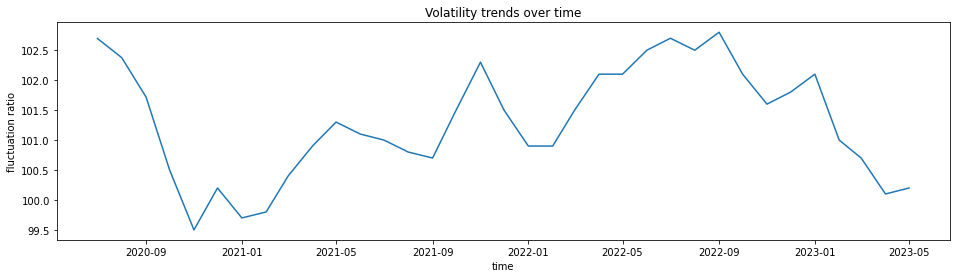

In [20]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dev_x = k
dev_y = y


plt.subplots(figsize=(16,4))
plt.plot(dev_x, dev_y)
plt.xlabel("time")
plt.ylabel("fluctuation ratio")
plt.title("Volatility trends over time")
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(data = data, columns=["datetime","数据"])

In [86]:
df["datetime"] = pd.to_datetime(df["datetime"])
features = ["year", "month", "day"]
df[features] = df.apply(lambda row: pd.Series({"year":row.datetime.year, "month":row.datetime.month, "day":row.datetime.day}), axis=1)

X = df[features]
y = df[["数据"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

0.5836616417333679


In [ ]:
#作图
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [95]:
print(model.coef_)  # 获取系数a, b 
print(model.intercept_)

[[0.36489713 0.09241363 0.        ]]
[-636.91102493]


## 移动平均法、指数平滑法、差分指数平滑法

简单移动平均法、加权移动平均法、趋势移动平均法

In [136]:
import math

# 读取 CSV 文件
def read_cvs(file):
    content = pd.read_csv(file)
    # data = np.array(content)
    col_2 = content["Count"]
    data = np.array(col_2)
    # print(data)
    return data

# 计算 [n, m] 区间内的 count 的平均值
def avergae_n_m(data, n, m):
    sum = 0;
    for i in range(m - n):
        sum += data[i + n]
    return round(sum / (m - n))

# 一次移动平均
def one_moving_average(data, N):
    # 第一个参数是表格数据，第二个参数是 N 跨度的取值
    if N > len(data):
        return "N 的取值大于数据的数量"
    # 定义 M 来记录预测计算结果
    M = []
    for i in range(len(data) - N):
        m = avergae_n_m(data, i, i + N)
        M.append(m)
    # 预测值
    M.append(avergae_n_m(data, len(data) - N, len(data)))
    # print("预测值为：", avergae_n_m(data, len(data) - N, len(data)))
    # print(M)
    # standard_deviation(data, M, N)
    return M

# 一次移动平均 计算标准差
def standard_deviation(data, M, N):
    # 第一个参数是表格数据，第二个是预测计算的数据，第三个是 N 跨度的取值
    sum = 0
    for i in range(len(M) - 1):
        sum += (pow(M[i] - data[i + N], 2))
    # print("standard_deviation")
    S = int(math.sqrt((sum) / (len(M) - 1)))
    print("N 为",N ,"时，标准差为：", S)


# 二次移动平均
def two_moving_average(data, N):
    M1 = one_moving_average(data, N)
    M2 = one_moving_average(M1, N)
    # print(M1)
    # print(M2)
    # 计算 T
    T = 1
    # print("T:", T)
    # 计算 a
    a = 2 * M1[len(M1) - 1] - M2[len(M2) - 1]
    # 计算 b
    b = (2 / (N - 1)) * (M1[len(M1) - 1] - M2[len(M2) - 1])
    print("a:", a, "b:", b)

    # 计算 X （预测值）
    X = a + b * T
    print("N 为", N, "时，二次移动平均法预测值:", X)
    # print("two_moving_average")

# 一次指数平滑法
def one_exponential_smoothing(data, a):
    # 第一个参数是表格数据，第二个参数是 a 分析加权系数
    S = []
    # 初始值的计算 s
    if len(data) > 50:
        s = round(data[0], 1)
    elif len(data) < 3:
        s = round(data[0], 1)
    else:
        s = round((data[0] + data[1] + data[2]) / 3, 1)
    # s = round(1145.0, 1)
    S.append(s)

    # s_flag 用于记录上一个计算结果
    s_flag = s

    # print(S)
    for i in range(len(data)):
        s_now = round(a * data[i] + (1 - a) * s_flag, 1)
        s_flag = s_now
        S.append(s_now)
    # print(S)
    # print("one_exponential_smoothing")
    # print("a 为", a, "时，一次指数平滑法预测值:", S[len(S) - 1])
    return S

# 二次指数平滑法
def two_exponential_smoothing(data, a):
    M1 = one_exponential_smoothing(data, a)
    M2 = one_exponential_smoothing(M1, a)
    # print(M1)
    # print(M2)

    # 计算 a
    A = round(2 * M1[len(M1) - 1] - M2[len(M2) - 1], 1)
    # 计算 b
    b = round((a / (1 - a)) * (M1[len(M1) - 1] - M2[len(M2) - 1]), 1)
    print("a:", A, "b:", b)

    # 计算 T
    T = 1
    # print("T:", T)

    # 计算 X （预测值）
    X = A + b * T
    print("a 为", a, "时，二次指数平滑法预测值:", X)

    # print("two_exponential_smoothing")

#if __name__ == '__main__':
    # 读取数据
    #data = read_cvs("train.csv")
    # print(data)
    # data = [35, 38, 33, 34, 38, 40]
    # data = [533.8, 574.6, 606.9, 649.8, 705.1, 772.0, 816.4, 892.7, 963.9, 1015.1, 1102.7]
    # data = [128, 132, 140, 157, 210, 318, 325, 276, 210, 154, 137, 125]

    # data = [10, 15, 8, 20, 10, 16, 18, 20, 22, 24, 20, 26, 27, 29, 29]
    # data = [5.25, 3.46, 2.67, 3.25, 4.70, 5.46, 5.18, 2.14, 4.23, 4.62, 1.57, 4.69]
    # data = [1344, 1650, 1951, 1641, 1515, 1982, 2519, 2818, 2937, 3142, 3093, 3500, 3497, 3944, 4416]

    # 一次移动平均法
    # for i in range(2,20):
    #     one_moving_average(data, i)

    # one_moving_average(data, 4)

    # 二次移动平均法
    for i in range(2,7):
        two_moving_average(data, i)

    # 一次指数平滑法
    # for i in range(1, 10):
    #     a = i / 10
    #     one_exponential_smoothing(data, a)

    # 二次指数平滑法
    # for i in range(1, 10):
    #     a = i / 10
    #     two_exponential_smoothing(data, a)
        # print(a)


## 自适应滤波法

In [ ]:
# 没实现

## 向量自回归（VAR）

矢量自回归(VAR) 是一种统计模型，用于捕捉随时间变化的多个数量之间的关系

In [ ]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
model = VAR(data) #data的数据是[[x1,x2]]
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.X, steps=1)